# <center>Classification des chiffres manuscrites</center>

## Partie 1 : Base de données, Analyse et Préparation

In [168]:
import os
import struct
import sys
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from PIL import Image 
import matplotlib.pyplot as plt

## Dossier "training"

In [169]:
from tqdm import tqdm

directory = ".\\data\\MNIST_Dataset_JPG_format\\MNIST_JPG_training\\"

liste_images = []
# liste pour enregistrer les labels
labels_train = []
# l va servir à numéroter les labels : dans la boucle, l s'incrémente de 1 à chaque passage 
l = -1


for x in tqdm(os.listdir(directory)):
    # incrémentation de l
    l = l +1
    for y in os.listdir(directory + x +"\\"):
        image = cv2.imread(directory + x +"\\"+y)
        liste_images.append(image)
        labels_train.append(l)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.00s/it]


## Informations

In [170]:
liste_images = np.array(liste_images)

print( 'classe :', type(liste_images) )
print( 'type :', liste_images.dtype )
print( 'taille :', liste_images.shape )
print( 'modifiable :', liste_images.flags.writeable )

classe : <class 'numpy.ndarray'>
type : uint8
taille : (60000, 28, 28, 3)
modifiable : True


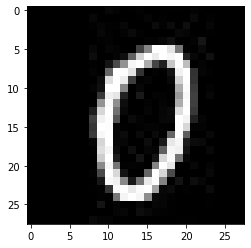

In [138]:
# plt.imshow( liste_images[1] )
# plt.show()

## Nuance de Gris

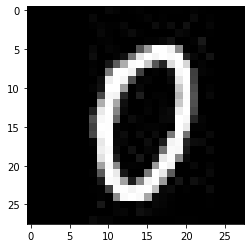

In [139]:
grey_image = cv2.cvtColor(liste_images[1], cv2.COLOR_RGB2GRAY)
plt.imshow(grey_image, cmap = 'Greys_r')
plt.show()

In [140]:
liste_gris = []

for x in tqdm(liste_images):
    grey_image = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    liste_gris.append(grey_image)
        

100%|████████████████████████████████████████████████████████████████████████| 60000/60000 [00:00<00:00, 149221.36it/s]


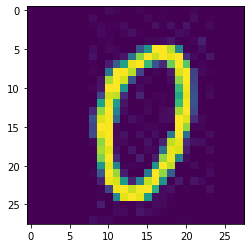

In [141]:
plt.imshow(liste_gris[1])
plt.show()

In [142]:
liste_gris[1].shape

(28, 28)

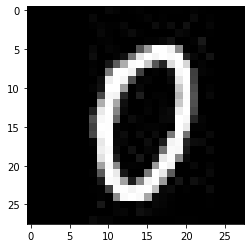

In [143]:
plt.imshow(liste_gris[1], cmap = 'Greys_r')
plt.show()

## Dossier "testing"

In [144]:
directory = ".\\data\\MNIST_Dataset_JPG_format\\MNIST_JPG_testing\\"

liste_images_test = []
# liste pour enregistrer les labels
labels_test = []
# l va servir à numéroter les labels : dans la boucle, l s'incrémente de 1 à chaque passage 
l = -1


for x in tqdm(os.listdir(directory)):
    # incrémentation de l
    l = l +1
    for y in os.listdir(directory + x +"\\"):
        image = cv2.imread(directory + x +"\\"+y)
        liste_images_test.append(image)
        labels_test.append(l)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.27it/s]


In [171]:
liste_images_test = np.array(liste_images_test)

print( 'classe :', type(liste_images_test) )
print( 'type :', liste_images_test.dtype )
print( 'taille :', liste_images_test.shape )
print( 'modifiable :', liste_images_test.flags.writeable )

classe : <class 'numpy.ndarray'>
type : uint8
taille : (10000, 28, 28, 3)
modifiable : True


In [172]:
liste_gris_test = []

for x in tqdm(liste_images_test):
    grey_image = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    liste_gris_test.append(grey_image)

100%|████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 108704.94it/s]


In [173]:
# plt.imshow(liste_gris_test[1])
# plt.show()

In [174]:
liste_gris_test[1].shape

(28, 28)

## Renommer les variables

In [175]:
# Normalisation des données
X_train = liste_gris
X_test = liste_gris_test
y_train = labels_train
y_test = labels_test


---

## Normalisation des données 

In [176]:
X_train = np.array(X_train)

print( 'classe :', type(X_train) )
print( 'type :', X_train.dtype )
print( 'taille :', X_train.shape )
print( 'modifiable :', X_train.flags.writeable )

classe : <class 'numpy.ndarray'>
type : uint8
taille : (60000, 28, 28)
modifiable : True


In [177]:
X_test = np.array(X_test)

print( 'classe :', type(X_test) )
print( 'type :', X_test.dtype )
print( 'taille :', X_test.shape )
print( 'modifiable :', X_test.flags.writeable )

classe : <class 'numpy.ndarray'>
type : uint8
taille : (10000, 28, 28)
modifiable : True


In [178]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [179]:
# Normalisation pixel (entre 0 et 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

## Visualisation des données

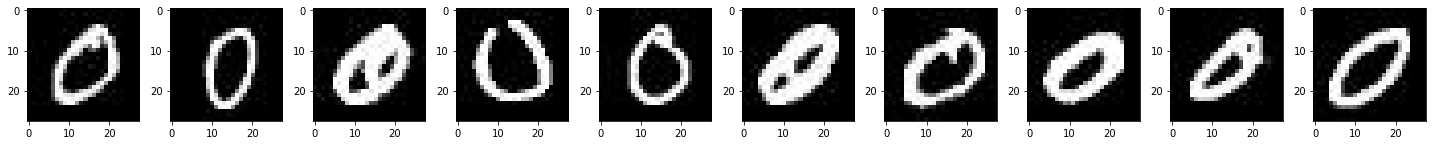

In [180]:
# visualisation de quelques images
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 4))
for i in range(10):
  ax[i].imshow(X_train[i], cmap='gray')

plt.tight_layout()
plt.show()

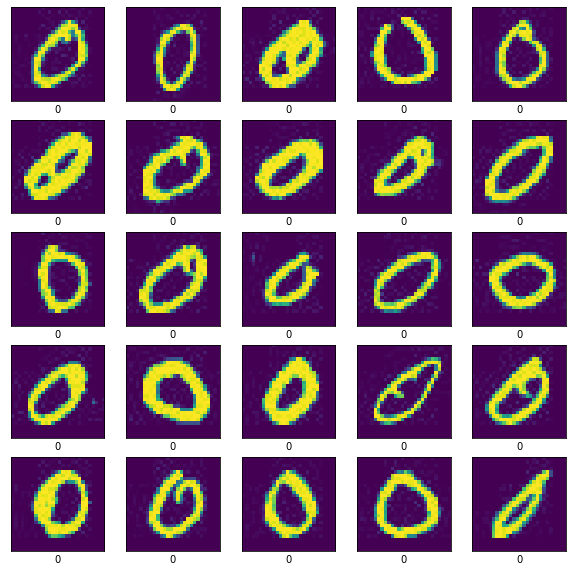

In [181]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i]])
    
plt.show()

---

## Partie 2 : Architecture CNN sur Tensorflow

In [182]:
from tensorflow import keras

# Configuration des couches du réseau
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [190]:
# Compilation du modele
model.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrainement du modele
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.1660 - val_accuracy: 0.9739
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 0.1370 - val_accuracy: 0.9807
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0107 - accuracy: 0.9971 - val_loss: 0.1349 - val_accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.1387 - val_accuracy: 0.9785
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 0.1358 - val_accuracy: 0.9794
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.1532 - val_accuracy: 0.9778
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0098 - accuracy: 0.9971 - val_loss: 0.1467 - val_accuracy:

In [191]:
# Evaluation du modele
test_loss, test_acc = model.evaluate(X_test,  y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1733 - accuracy: 0.9777
Test accuracy: 0.9776999950408936


313/313 [==============================] - 1s 2ms/step - loss: 0.1733 - accuracy: 0.9777


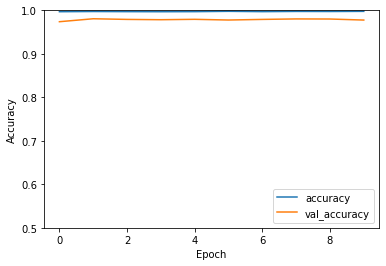

In [193]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test)#, verbose=2)

In [194]:
# modele prédictif (softmax)
prediction_model = keras.Sequential([model, keras.layers.Softmax()])
predict_proba = prediction_model.predict(X_test)
predictions = np.argmax(predict_proba, axis=1)

print(predictions[:10])
print(y_test[:10])

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


## Partie 3 : Application